# IMPORT LIBRARY
Mengimport library yang akan diperlukan 


In [ ]:
import random
import numpy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
from matplotlib.animation import FuncAnimation
from matplotlib import colors
from pylab import text
from matplotlib import rc
from IPython.display import HTML

# INISIALISASI
Inisialisasi konstanta dan input probabilitas


In [ ]:
n=25
t=50
probSusceptible = float(input("Masukkan probSusceptible: "))
probInfectious  = float(input("Masukkan probInfectious: "))

Masukkan probSusceptible: 0.8
Masukkan probInfectious: 0.1


# Fungsi Inisialisasi Grid 
Sebagai kondisi awal lingkungan 2 dimensi berukuran nxn

In [ ]:
def initGrid(n,probSusceptible,probInfectious):
  GRID = [[0 for j in range(n)]for i in range(n)]
  for i in range(n):
    for j in range(n):
        rand=random.random()
        if (rand < probSusceptible):
          GRID[i][j] = 0
        else:
          rand2=random.random()
          if (rand2<probInfectious):
            GRID[i][j]=random.randint(1,2)
          else:
            GRID[i][j]=random.randint(3,7)
  return GRID

# Fungsi Kondisi Batas Absorbing

In [ ]:
def absorbingLat(lat):
  a=8
  latNS = [[0 for j in range(n+2)] for i in range(n+2)]
  for i in range (1,n+1):
    for j in range (1,n+1):
      latNS[i][j]=lat[i-1][j-1]
  for i in range (n+2):
    for j in range (n+2):
      latNS[0][j]=a
      latNS[i][0]=a
      latNS[n+1][j]=a
      latNS[i][n+1]=a
  return latNS

# Fungsi Penyebaran Virus Berdasarkan Aturan Transisi
Untuk mengembalikan nilai dari site pada waktu selanjutnya. Nilai dari site pada tiap iterasi dapat berubah karena faktor ketetanggaannya.

In [ ]:
def spread(site, N, S, E, W):
  if (site == 0):
    if N ==1 or W==1 or E==1 or S==1:
      newSite=1
    elif N ==2 or W==2 or E==2 or S==2:
      newSite=1
    else:
      newSite=0
  else:
    newSite = (site + 1)%8  
  return newSite

# Fungsi untuk Menerapkan *Spread* pada Grid yang Telah Ditambah Batasnya



In [ ]:
def applyExtended(latExt, probInfectious, probSusceptible):
    newLat =[[0 for j in range(25)]for i in range(25)]
    for i in range(1,26):
      for j in range(1,26):
        site = latExt[i][j]
        N = latExt[i-1][j]
        S = latExt[i+1][j]
        E = latExt[i][j+1]
        W = latExt[i][j-1]
        newLat[i-1][j-1] = spread(site, N, S, E, W)
    return newLat

# Fungsi Simulasi Penyebaran *Stomach Virus*
Untuk menyimpan nilai grid pada tiap iterasI

In [ ]:
def virus(n,probSusceptible, probInfectious ,t):
    GRID = initGrid(n,probSusceptible,probInfectious)
    # Jalankan Simulasi
    grids = np.zeros((t+1,n,n))     
    grids[0, :, :] = GRID                                                      
    for i in range(1,t+1):
        gridExtended = absorbingLat(GRID)
        GRID = applyExtended(gridExtended, probInfectious, probSusceptible)
        grids[i,:, :] = GRID    
    return grids

# ANIMASI

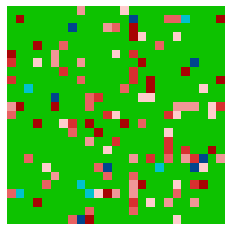

In [ ]:
grids = virus(n,probSusceptible, probInfectious ,t)

colours = ["#0DC200", "#00458E", "#00C2CE", "#A70303", "#D83030", "#E86161", "#F09797", "#FECDCD"]
cmap = colors.ListedColormap(colours)
bounds = [0, 1, 2, 3, 4, 5, 6, 7]
norm = colors.BoundaryNorm(bounds, cmap.N)
 
fig = plt.figure()
plt.axis('off')
im = plt.imshow(grids[0,:,:],cmap=cmap,animated=True)
 
def updatefig(i, *args):
    im.set_array(grids[i,:,:])
    return im,
 
anim = animation.FuncAnimation(fig, updatefig, save_count = len(grids), 
                                   interval=100, blit=False)
plt.show() 

rc('animation', html='jshtml')
anim